✅ Combined comparison saved to: combined_comparison.png


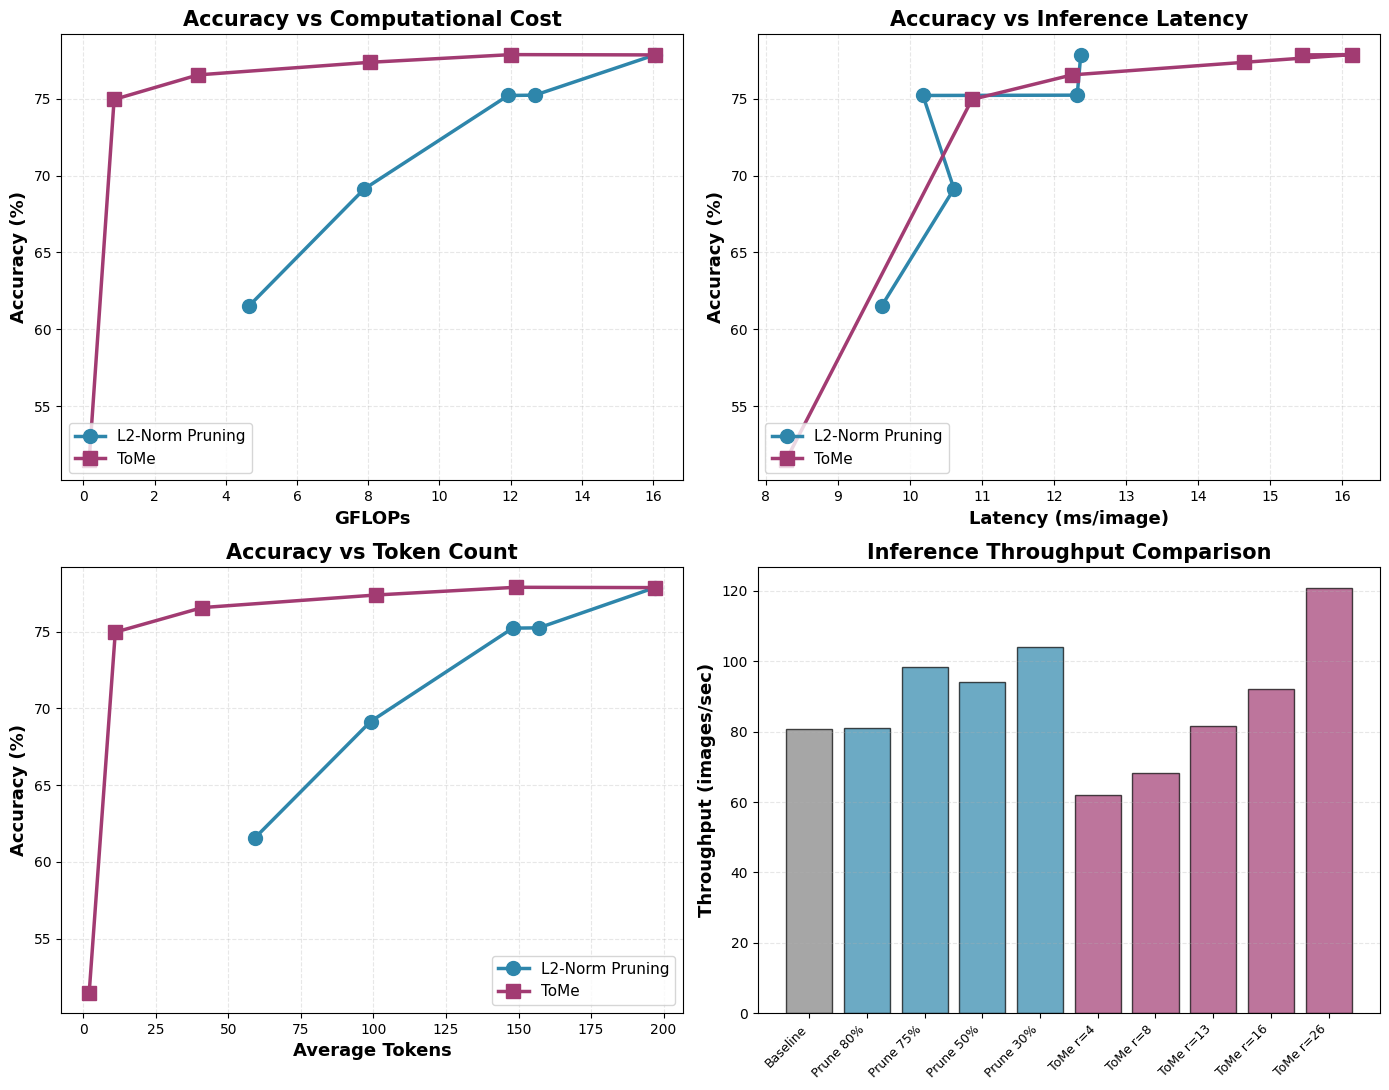


COMBINED RESULTS SUMMARY
           Method  Accuracy (%)  Latency (ms)  GFLOPs Speedup vs Baseline
 L2-Pruning (1.0)         77.86         12.37   16.05               1.00x
 L2-Pruning (0.8)         75.24         12.32   12.68               1.00x
L2-Pruning (0.75)         75.22         10.18   11.93               1.22x
 L2-Pruning (0.5)         69.14         10.61    7.89               1.17x
 L2-Pruning (0.3)         61.54          9.61    4.66               1.29x
       ToMe (r=0)         77.86         15.44   16.05               1.00x
       ToMe (r=4)         77.88         16.13   12.01               0.96x
       ToMe (r=8)         77.38         14.64    8.05               1.05x
      ToMe (r=13)         76.56         12.25    3.22               1.26x
      ToMe (r=16)         74.96         10.86    0.86               1.42x
      ToMe (r=26)         51.48          8.28    0.16               1.86x


Summary saved to: summary_comparison.csv

EFFICIENCY ANALYSIS

L2-Norm Pruning @ 75%

In [3]:
"""
Combined comparison: Your Pruning vs ToMe
"""
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load results
pruning_df = pd.read_csv("pruning_results.csv")
tome_df = pd.read_csv("tome_results.csv")

# Add method column
pruning_df['Method'] = 'L2-Norm Pruning'
tome_df['Method'] = 'ToMe (Token Merging)'

# Rename columns for consistency
tome_df = tome_df.rename(columns={'GFLOPs (est)': 'GFLOPs', 'Approx Tokens': 'Avg Tokens'})

# Create combined comparison plot
fig, axes = plt.subplots(2, 2, figsize=(14, 11))

# 1. Accuracy vs GFLOPs
axes[0, 0].plot(pruning_df['GFLOPs'], pruning_df['Accuracy (%)'], 
                marker='o', linewidth=2.5, markersize=10, label='L2-Norm Pruning', color='#2E86AB')
axes[0, 0].plot(tome_df['GFLOPs'], tome_df['Accuracy (%)'], 
                marker='s', linewidth=2.5, markersize=10, label='ToMe', color='#A23B72')
axes[0, 0].set_xlabel('GFLOPs', fontsize=13, fontweight='bold')
axes[0, 0].set_ylabel('Accuracy (%)', fontsize=13, fontweight='bold')
axes[0, 0].set_title('Accuracy vs Computational Cost', fontsize=15, fontweight='bold')
axes[0, 0].legend(fontsize=11, loc='lower left')
axes[0, 0].grid(True, alpha=0.3, linestyle='--')

# 2. Accuracy vs Latency
axes[0, 1].plot(pruning_df['Latency (ms)'], pruning_df['Accuracy (%)'], 
                marker='o', linewidth=2.5, markersize=10, label='L2-Norm Pruning', color='#2E86AB')
axes[0, 1].plot(tome_df['Latency (ms)'], tome_df['Accuracy (%)'], 
                marker='s', linewidth=2.5, markersize=10, label='ToMe', color='#A23B72')
axes[0, 1].set_xlabel('Latency (ms/image)', fontsize=13, fontweight='bold')
axes[0, 1].set_ylabel('Accuracy (%)', fontsize=13, fontweight='bold')
axes[0, 1].set_title('Accuracy vs Inference Latency', fontsize=15, fontweight='bold')
axes[0, 1].legend(fontsize=11, loc='lower left')
axes[0, 1].grid(True, alpha=0.3, linestyle='--')

# 3. Tokens vs Accuracy
axes[1, 0].plot(pruning_df['Avg Tokens'], pruning_df['Accuracy (%)'], 
                marker='o', linewidth=2.5, markersize=10, label='L2-Norm Pruning', color='#2E86AB')
axes[1, 0].plot(tome_df['Avg Tokens'], tome_df['Accuracy (%)'], 
                marker='s', linewidth=2.5, markersize=10, label='ToMe', color='#A23B72')
axes[1, 0].set_xlabel('Average Tokens', fontsize=13, fontweight='bold')
axes[1, 0].set_ylabel('Accuracy (%)', fontsize=13, fontweight='bold')
axes[1, 0].set_title('Accuracy vs Token Count', fontsize=15, fontweight='bold')
axes[1, 0].legend(fontsize=11, loc='lower right')
axes[1, 0].grid(True, alpha=0.3, linestyle='--')

# 4. Throughput comparison (bar chart)
methods = ['Baseline'] + [f'Prune {int(r*100)}%' for r in pruning_df['Keep Ratio'][1:]] + \
          [f'ToMe r={r}' for r in tome_df['r'][1:]]
throughputs = list(pruning_df['Throughput (img/s)']) + list(tome_df['Throughput (img/s)'][1:])
colors_list = ['gray'] + ['#2E86AB']*(len(pruning_df)-1) + ['#A23B72']*(len(tome_df)-1)

x_pos = np.arange(len(methods))
axes[1, 1].bar(x_pos, throughputs, color=colors_list, alpha=0.7, edgecolor='black')
axes[1, 1].set_ylabel('Throughput (images/sec)', fontsize=13, fontweight='bold')
axes[1, 1].set_title('Inference Throughput Comparison', fontsize=15, fontweight='bold')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(methods, rotation=45, ha='right', fontsize=9)
axes[1, 1].grid(True, alpha=0.3, axis='y', linestyle='--')

plt.tight_layout()
plt.savefig('combined_comparison.png', dpi=300, bbox_inches='tight')
print("✅ Combined comparison saved to: combined_comparison.png")
plt.show()

# Create summary table
print("\n" + "="*80)
print("COMBINED RESULTS SUMMARY")
print("="*80)

# Select key configurations for comparison
key_pruning = pruning_df[pruning_df['Keep Ratio'].isin([1.0, 0.8, 0.75, 0.5, 0.3])]
key_tome = tome_df[tome_df['r'].isin([0, 4, 8, 13, 16, 26])]

summary_data = []
for _, row in key_pruning.iterrows():
    summary_data.append({
        'Method': f"L2-Pruning ({row['Keep Ratio']})",
        'Accuracy (%)': row['Accuracy (%)'],
        'Latency (ms)': row['Latency (ms)'],
        'GFLOPs': row['GFLOPs'],
        'Speedup vs Baseline': f"{pruning_df.iloc[0]['Latency (ms)'] / row['Latency (ms)']:.2f}x"
    })

for _, row in key_tome.iterrows():
    summary_data.append({
        'Method': f"ToMe (r={row['r']})",
        'Accuracy (%)': row['Accuracy (%)'],
        'Latency (ms)': row['Latency (ms)'],
        'GFLOPs': row['GFLOPs'],
        'Speedup vs Baseline': f"{tome_df.iloc[0]['Latency (ms)'] / row['Latency (ms)']:.2f}x"
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))
print("\n")

summary_df.to_csv("summary_comparison.csv", index=False)
print("Summary saved to: summary_comparison.csv")

# Calculate efficiency metrics
print("\n" + "="*80)
print("EFFICIENCY ANALYSIS")
print("="*80)

baseline_acc = pruning_df.iloc[0]['Accuracy (%)']
baseline_gflops = pruning_df.iloc[0]['GFLOPs']

print("\nL2-Norm Pruning @ 75% tokens:")
p75 = pruning_df[pruning_df['Keep Ratio'] == 0.75].iloc[0]
print(f"  Accuracy drop: {baseline_acc - p75['Accuracy (%)']:.2f}%")
print(f"  GFLOPs reduction: {(1 - p75['GFLOPs']/baseline_gflops)*100:.1f}%")
print(f"  Speedup: {pruning_df.iloc[0]['Latency (ms)'] / p75['Latency (ms)']:.2f}x")

print("\nToMe @ r=8:")
t8 = tome_df[tome_df['r'] == 8].iloc[0]
print(f"  Accuracy drop: {baseline_acc - t8['Accuracy (%)']:.2f}%")
print(f"  GFLOPs reduction: {(1 - t8['GFLOPs']/baseline_gflops)*100:.1f}%")
print(f"  Speedup: {tome_df.iloc[0]['Latency (ms)'] / t8['Latency (ms)']:.2f}x")
